Created 15/03/21 10:47am

Last Edited: 16/03/21 11:40am

In [1]:
import atomica as at
import numpy as np
import matplotlib.pyplot as plt
import sciris as sc

### Generate a model using the HIV-negative only framework and databook

-> Framework v02

-> Databook v02

Since I've been having trouble with transitions (I may just turn HIV into a new set of compartments), I'm going to introduce programs first.

In [2]:
F = at.ProjectFramework('syphilis_framework_v02.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_databook_v02.xlsx', framework=F)
P = at.Project(framework= F, databook = D)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0426s


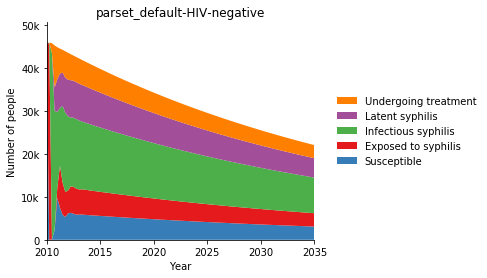

In [3]:
d = at.PlotData(P.results[0], project= P)
at.plot_series(d, plot_type='stacked');

Text(0.5, 1.0, 'Incidence flow (people/year)')

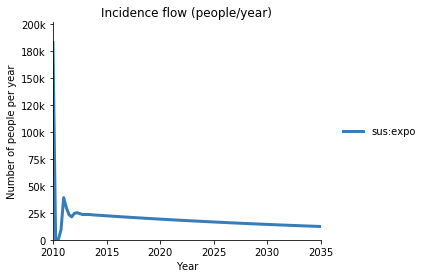

In [4]:
d2 = at.PlotData(P.results[0], 'sus:expo')
at.plot_series(d2)
plt.title('Incidence flow (people/year)')

## Let's fix the parameter to include condom usage and effectiveness.

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0119s


Text(0.5, 1.0, 'Incidence flow (people/year)')

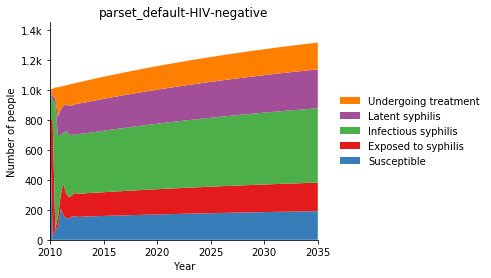

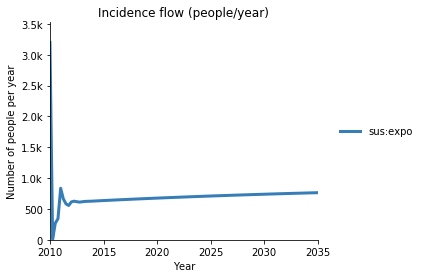

In [7]:
F = at.ProjectFramework('syphilis_framework_v02_2.xlsx') # Edited to include condom use
D = at.ProjectData.from_spreadsheet('syphilis_databook_v02.xlsx', framework=F)
P = at.Project(framework= F, databook = D)

d = at.PlotData(P.results[0], project= P)
at.plot_series(d, plot_type='stacked');

d2 = at.PlotData(P.results[0], 'sus:expo')
at.plot_series(d2)
plt.title('Incidence flow (people/year)')

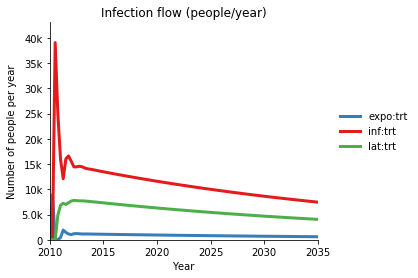

In [9]:
d = at.PlotData(P.results[0],['expo:trt','inf:trt','lat:trt'])
at.plot_series(d);
plt.title('Infection flow (people/year)');

## It might also be good to calibrate the model to the data we have

## Let's explore the _data_ object

In this instance, I created a new variable in the framework that needs to be added into the databook. I wonder what happens if I load the databook with the framework with the added variable and save it.

In [31]:
F = at.ProjectFramework('syphilis_neg_framework_v01.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_neg_databook_v01_1.xlsx',framework=F)
#D.save('syphilis_neg_databook_v01_1.xlsx')

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

In [32]:
D.validate(framework=F)

True

## Creating a program based on the parameters

In [25]:
progset = at.ProgramSet.new(framework=P.framework, data=P.data,tvec=[2015], progs=1)
progset.save('Syphilis_opt_out_testing_v02.xlsx')

Object saved to C:\Users\iamph\Google Drive (phillip.luong@burnet.edu.au)\Coding Projects\2021-03 Syphilis Modelling Atomica\Syphilis_opt_out_testing_v02.xlsx.


In [43]:
F = at.ProjectFramework('syphilis_neg_framework_v01.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_neg_databook_v01_1.xlsx',framework=F)
P = at.Project(framework = F, databook= D)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.00996s


In [57]:
#pset = at.ProgramSet.from_spreadsheet('Syphilis_opt_out_testing.xlsx',framework=F,data=D)
pset = P.load_progbook('syphilis_opt_out_testing.xlsx')
instructions = at.ProgramInstructions(start_year=2015)

In [58]:
res_baseline = P.run_sim(P.parsets[0], result_name='Baseline')
res_programs = P.run_sim(P.parsets[0], progset=P.progsets[0], progset_instructions=instructions,result_name='Opt-out Program')

Elapsed time for running "default": 0.0150s


Negative transition occurred
Negative transition occurred


Elapsed time for running "default": 0.0339s


Text(0.5, 1.0, 'Infection flow (people/year)')

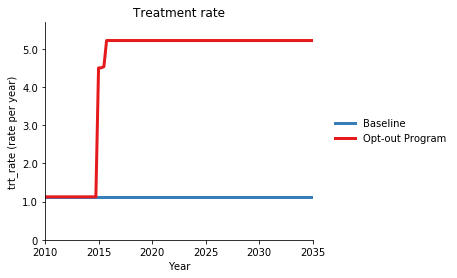

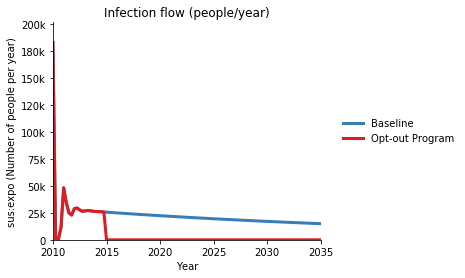

In [59]:
d = at.PlotData([res_baseline, res_programs], 'trt_rate')
at.plot_series(d, axis='results')
plt.title('Treatment rate');

d = at.PlotData([res_baseline, res_programs], 'sus:expo')
at.plot_series(d,axis='results')
plt.title('Infection flow (people/year)')

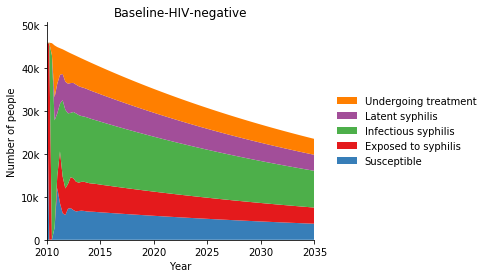

In [60]:
d = at.PlotData(res_baseline, project=P)
at.plot_series(d, plot_type='stacked');

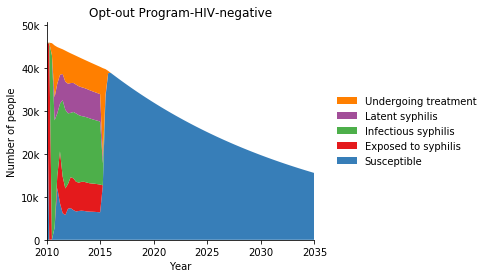

In [61]:
d = at.PlotData(res_programs, project=P)
at.plot_series(d, plot_type='stacked');

So we're getting this result based on the actual 'program'. Maybe what I should do to test these outcomes, is to write 'scenarios' instead, since I don't really have any monetary values to suggest about syphilis program spending.

Elapsed time for running "default": 0.0140s


Text(0.5, 1.0, 'Infection flow (people/year)')

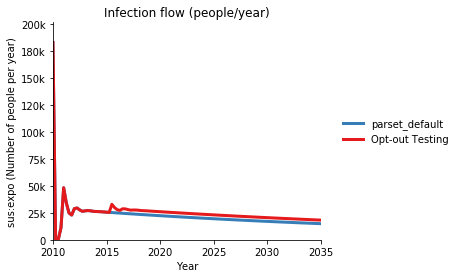

In [63]:
scen = at.ParameterScenario(name='Opt-out Testing')
scen.add('prop_test','neg',2015,0.9)
res = scen.run(P,P.parsets[0])
d = at.PlotData([P.results[0],res],'sus:expo')
at.plot_series(d, axis='results');
plt.title('Infection flow (people/year)')

Text(0.5, 1.0, 'Treatment compartmnet')

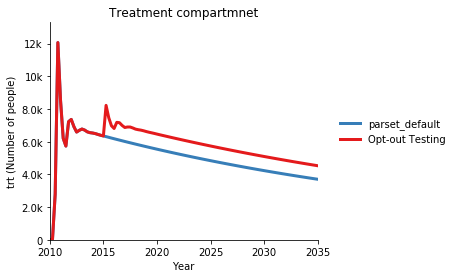

In [64]:
d = at.PlotData([P.results[0],res],'trt')
at.plot_series(d, axis='results');
plt.title('Treatment compartment');

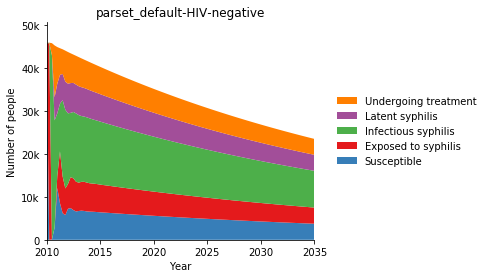

In [66]:
d = at.PlotData(P.results[0], project=P)
at.plot_series(d, plot_type='stacked');

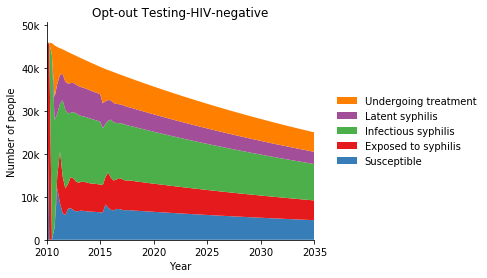

In [65]:
d = at.PlotData(res, project=P)
at.plot_series(d, plot_type='stacked');

Let's extract the parameter set

In [68]:
parset = scen.get_parset(P.parsets[0],P)
parset.pars['trt_rate'].ts['neg']

————————————————————————————————————————————————————————————
Methods:
  copy()              interpolate()       remove_between()    
  get()               remove()            sample()            
  get_arrays()        remove_after()      insert()            
  remove_before()     
————————————————————————————————————————————————————————————
Properties:
  has_data            has_time_data       
————————————————————————————————————————————————————————————
  _sampled: False
assumption: None
     sigma: None
         t: []
     units: 'Rate (per year)'
      vals: []
————————————————————————————————————————————————————————————

#### Let's include two more scenarios before we move onto something else:

1. Increase the testing frequency of GBM
2. Combine the two
3. Increasing condom usage

In [73]:
freq = at.ParameterScenario(name = 'Increase Testing Frequency')
freq.add('test_rate','neg',2015, 2)

res_f = freq.run(P,P.parsets[0])

both = at.ParameterScenario(name = 'Increase Coverage and Frequency')
both.add('test_rate','neg', 2015, 2)
both.add('prop_test','neg',2015, 0.9)

res_b = both.run(P,P.parsets[0])

cndm = at.ParameterScenario(name='Increase Condom Usage')
cndm.add('cndm','neg',2015,0.8)

res_c = cndm.run(P,P.parsets[0])

Elapsed time for running "default": 0.221s
Elapsed time for running "default": 0.0190s
Elapsed time for running "default": 0.0179s


Text(0.5, 1.0, 'Infection flow (people/year)')

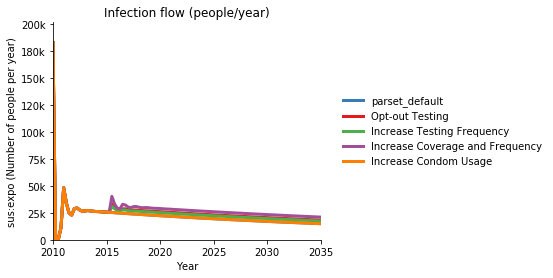

In [75]:
d = at.PlotData([P.results[0],res,res_f,res_b,res_c],'sus:expo')
at.plot_series(d, axis='results');
plt.title('Infection flow (people/year)')

Text(0.5, 1.0, 'Infection flow (people/year)')

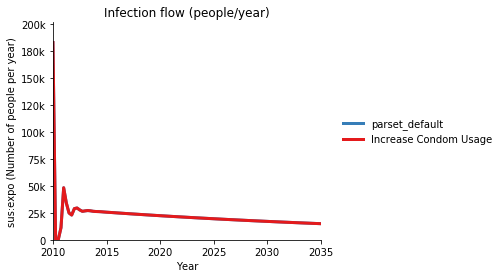

In [76]:
d = at.PlotData([P.results[0],res_c],'sus:expo')
at.plot_series(d, axis='results');
plt.title('Infection flow (people/year)')

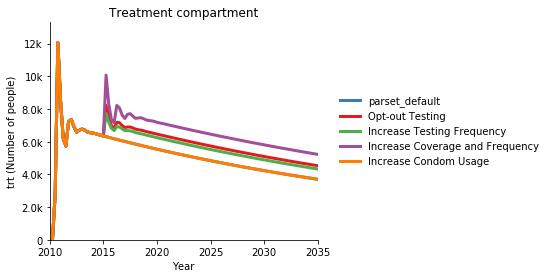

In [74]:
d = at.PlotData([P.results[0],res,res_f,res_b,res_c],'trt')
at.plot_series(d, axis='results');
plt.title('Treatment compartment');

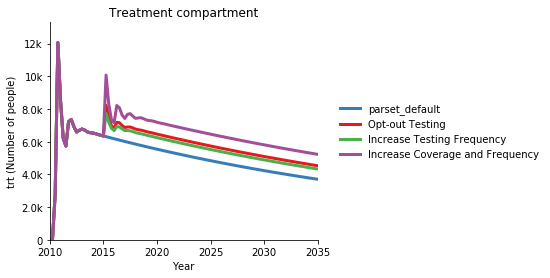

In [72]:
d = at.PlotData([P.results[0],res,res_f,res_b],'trt')
at.plot_series(d, axis='results');
plt.title('Treatment compartment');

### Let's try calibrating using the data we have (through estimating the population and the prevalence of syphilis)

If we have the number of notified infectious syphilis infections, then we should get a good indication of the number of people going into the recovery compartment (right?)

OR we can estimate the number of people who are infected (ie. the force of infection).

Regardless, I'm going to create a good template for calibration, then transfer everything I've done so far into the powerpoint and do the rest of the work tomorrow. 

In [81]:
F = at.ProjectFramework('syphilis_neg_framework_v01.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_neg_databook_v01_1.xlsx',framework=F)
P = at.Project(framework = F, databook= D)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0349s


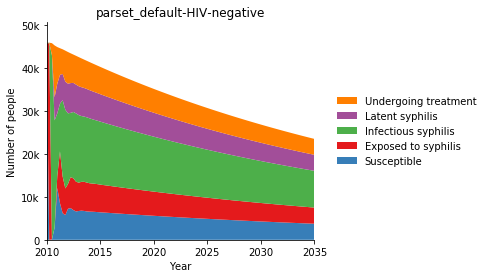

In [82]:
d = at.PlotData(P.results[0], project=P)
at.plot_series(d, plot_type='stacked');

[<Figure size 432x288 with 1 Axes>]

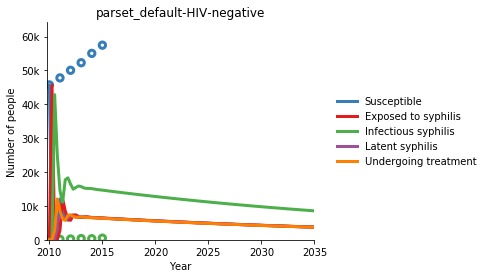

In [83]:
at.plot_series(d, data=P.data)

In [98]:
P.parsets[0].get_par('b_rate').y_factor

#0: "neg": 1.0


In [99]:
P.parsets[0].get_par('infx').y_factor

#0: "neg": 1.0


In [88]:
P.parset[0].pars['b_rate'].y_factor

TypeError: 'method' object is not subscriptable

In [108]:
with at.Quiet():
    p3 = P.calibrate(max_time=10, parset='default',adjustables=['b_rate','infx'], measurables=['sus','inf']);

In [109]:
p3.pars['b_rate'].y_factor

#0: "neg": 2.0


In [110]:
p3.pars['infx'].y_factor

#0: "neg": 0.0


In [106]:
p3.pars['infx'].y_factor['neg'] = 0.1

Elapsed time for running "default": 0.0149s


[<Figure size 432x288 with 1 Axes>]

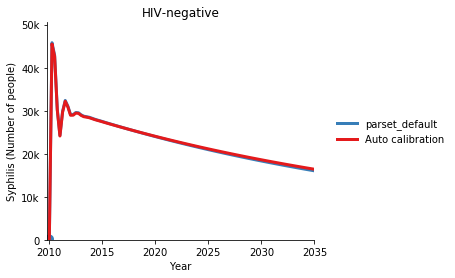

In [107]:
r3 = P.run_sim(parset=p3, result_name = 'Auto calibration')
d = at.PlotData([P.results[0],r3], outputs='syphilis',project=P)
at.plot_series(d,axis='results',data=P.data)

Elapsed time for running "default": 0.0180s


[<Figure size 432x288 with 1 Axes>]

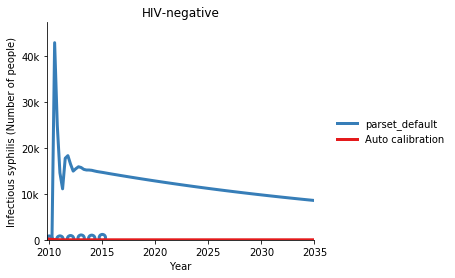

In [111]:
r3 = P.run_sim(parset=p3, result_name = 'Auto calibration')
d = at.PlotData([P.results[0],r3], outputs='inf',project=P)
at.plot_series(d,axis='results',data=P.data)

## Let's soom into that to see if we can get some meaningful results

Clearly, there's some smoothing that needs to be done (drop results, for a burn-in period?)

### How do I extract the y coordinates? Though I expect the auto-calibration gave me 0

Let's see what happens if I change the `max_time`

In [112]:
with at.Quiet():
    p3 = P.calibrate(max_time=100, parset='default',adjustables=['b_rate','infx'], measurables=['sus','inf']);

In [113]:
p3.pars['b_rate'].y_factor

#0: "neg": 2.0


In [114]:
p3.pars['infx'].y_factor

#0: "neg": 0.0


Elapsed time for running "default": 0.0189s


[<Figure size 432x288 with 1 Axes>]

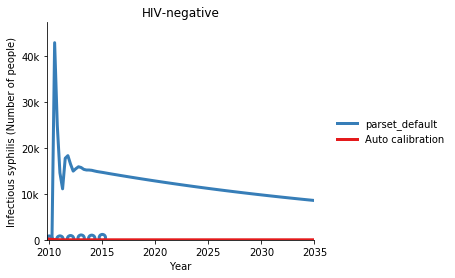

In [115]:
r3 = P.run_sim(parset=p3, result_name = 'Auto calibration')
d = at.PlotData([P.results[0],r3], outputs='inf',project=P)
at.plot_series(d,axis='results',data=P.data)

### Clearly the results are no different


See what happens if I only calibrate one parameter at a time!

In [2]:
F = at.ProjectFramework('syphilis_neg_framework_v01.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_neg_databook_v01_1.xlsx',framework=F)
P = at.Project(framework = F, databook= D)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0281s


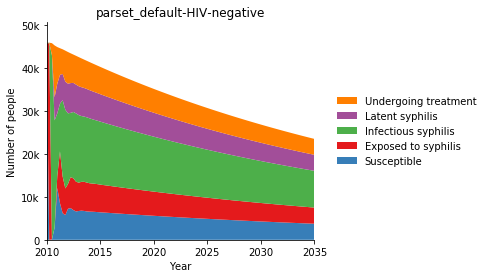

In [3]:
d = at.PlotData(P.results[0], project=P)
at.plot_series(d, plot_type='stacked');

[<Figure size 432x288 with 1 Axes>]

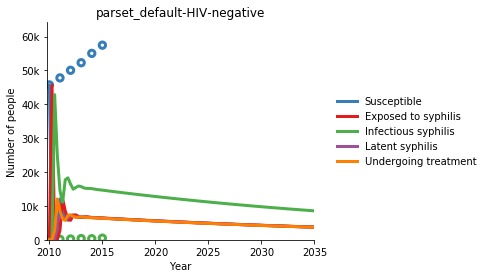

In [5]:
at.plot_series(d, data=P.data)

In [6]:
with at.Quiet():
    p3 = P.calibrate(max_time=10, parset='default',adjustables=['b_rate'], measurables=['sus']);

In [7]:
p3.pars['b_rate'].y_factor

#0: "neg": 2.0


In [8]:
p3.pars['infx'].y_factor

#0: "neg": 1.0


In [10]:
r3 = P.run_sim(parset = p3, result_name = 'Auto calibration for population')

Elapsed time for running "default": 0.0180s


[<Figure size 432x288 with 1 Axes>]

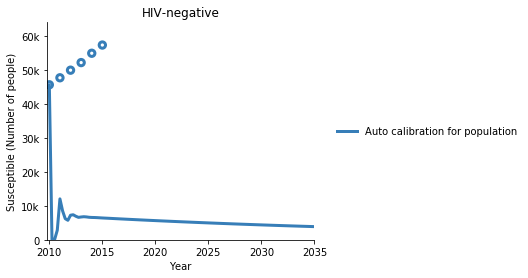

In [12]:
d = at.PlotData(r3, outputs='sus',project=P)
at.plot_series(d,axis='results',data=P.data)

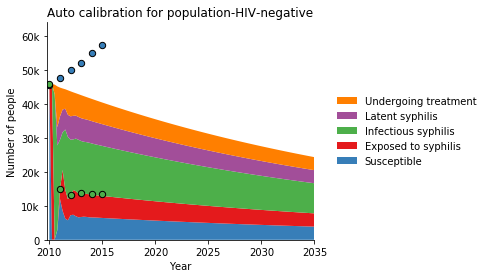

In [14]:
d = at.PlotData(r3, project=P)
at.plot_series(d, plot_type='stacked',data=P.data);

Elapsed time for running "default": 0.0159s


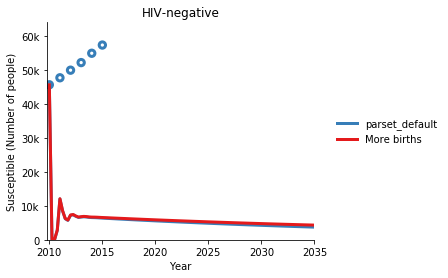

In [16]:
p2 = P.parsets[0].copy()
p2.pars['b_rate'].y_factor['neg'] = 5

r2 = P.run_sim(parset=p2, result_name = 'More births')
d = at.PlotData([P.results[0],r2], outputs='sus',project=P)
at.plot_series(d, axis='results', data=P.data);

## What happens if I change the birth rate to not a constant?
(databook v01_2)

C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
C:\Users\iamph\Miniconda3\envs\tensorflow\lib\site-packages\open

Elapsed time for running "default": 0.0209s


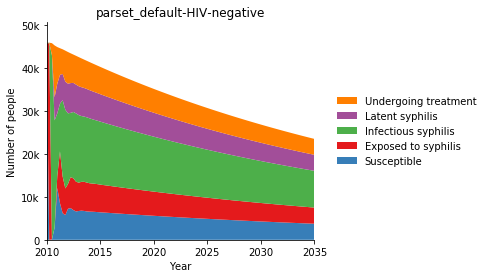

In [18]:
F = at.ProjectFramework('syphilis_neg_framework_v01.xlsx')
D = at.ProjectData.from_spreadsheet('syphilis_neg_databook_v01_2.xlsx',framework=F)
P = at.Project(framework = F, databook= D);

d = at.PlotData(P.results[0], project=P)
at.plot_series(d, plot_type='stacked');

Elapsed time for running "default": 0.0160s


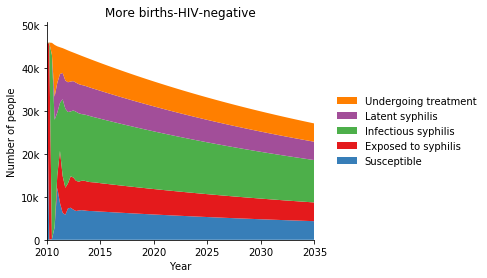

In [21]:
p2 = P.parsets[0].copy()
p2.pars['b_rate'].y_factor['neg'] = 5

r2 = P.run_sim(parset=p2, result_name = 'More births')
d = at.PlotData(r2,project=P)
at.plot_series(d, plot_type='stacked');

It just appears that the birth rate (or at least the y_factor of the birth rate) doesn't change anything

In [22]:
with at.Quiet():
    p3 = P.calibrate(max_time=100, parset='default',adjustables=['b_rate'], measurables=['sus']);

In [23]:
p3.pars['b_rate'].y_factor

#0: "neg": 2.0


Elapsed time for running "default": 0.0130s


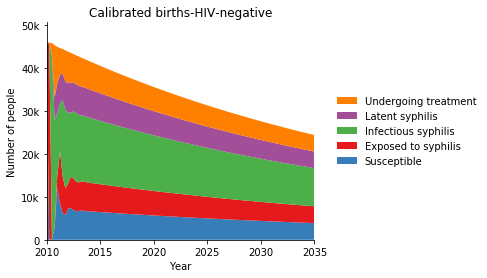

In [24]:
r3 = P.run_sim(parset=p3, result_name = 'Calibrated births')
d = at.PlotData(r3,project=P)
at.plot_series(d, plot_type='stacked');

Elapsed time for running "default": 0.0110s


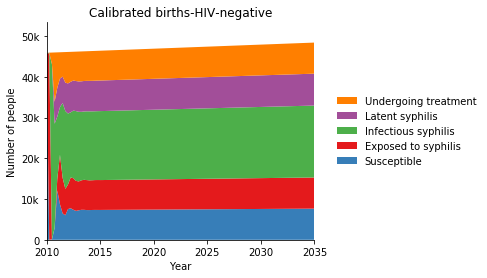

In [26]:
with at.Quiet():
    p4 = P.calibrate(max_time=10, parset='default',adjustables=['b_rate','doth_rate'], measurables=['sus']);
    
r4 = P.run_sim(parset=p4, result_name = 'Calibrated births')
d = at.PlotData(r4,project=P)
at.plot_series(d, plot_type='stacked');

In [31]:
p4.pars['doth_rate'].y_factor

#0: "neg": 0.0


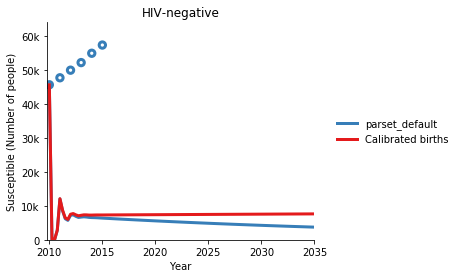

In [32]:
d = at.PlotData([P.results[0],r4], outputs='sus',project=P)
at.plot_series(d, axis='results', data=P.data);

## I'll still need to perform a series of calibrations to make sure that both my susceptible and infectious syphilis populations match

In [46]:
cal_par = P.parsets['default'].copy()
with at.Quiet():
    for _ in range(10):
        cal_par = P.calibrate(max_time=10, parset=cal_par, adjustables=['b_rate','doth_rate'], measurables = ['sus'])
        cal_par = P.calibrate(max_time=10, parset=cal_par, adjustables=['infx','cndm'], measurables = ['inf'])

In [50]:
cal_par.pars['b_rate'].y_factor

#0: "neg": 2.0


In [49]:
cal_par.pars['doth_rate'].y_factor

#0: "neg": 0.0


In [48]:
cal_par.pars['infx'].y_factor

#0: "neg": 2.0


In [47]:
cal_par.pars['cndm'].y_factor

#0: "neg": 0.0


Elapsed time for running "default": 0.0150s


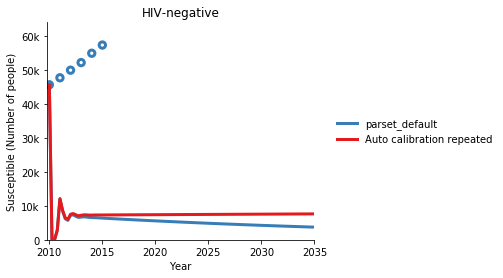

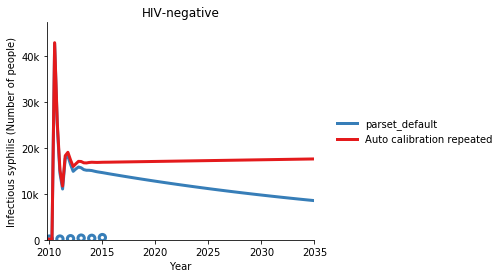

In [45]:
r4 = P.run_sim(parset=cal_par,result_name = 'Auto calibration repeated')
for output in ['sus', 'inf']:
    d = at.PlotData([P.results[0],r4], outputs=output,project=P)
    at.plot_series(d,axis='results',data=P.data);